In [221]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
dataset=pd.read_csv('UniversityAdmittance.csv')
dataset.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [223]:
X = dataset.iloc[:, [1, 8]].values #extrating the values from the columns 

In [224]:
m=X.shape[0] #setting the number of examples
n=X.shape[1] #setting the number of features

In [225]:
m

400

In [226]:
n

2

In [227]:
X[:10,:]

array([[337.  ,   0.92],
       [324.  ,   0.76],
       [316.  ,   0.72],
       [322.  ,   0.8 ],
       [314.  ,   0.65],
       [330.  ,   0.9 ],
       [321.  ,   0.75],
       [308.  ,   0.68],
       [302.  ,   0.5 ],
       [323.  ,   0.45]])

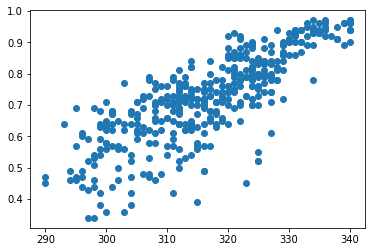

In [228]:
plt.scatter(X[:,0],X[:,1])

<function matplotlib.pyplot.show>

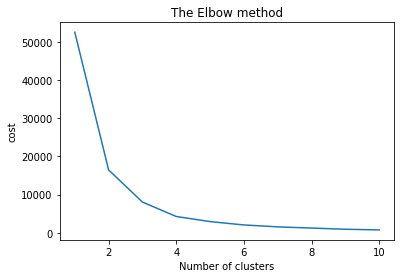

In [229]:
#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
cost=[]
for k in range (1,11):
    kmeans = KMeans (n_clusters= k, init= 'k-means++',random_state= 42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
plt.plot(range(1,11),cost)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show

In [230]:
K=4 #number of clusters 
iterations=5000 #number of iterations

In [231]:
centroids=np.zeros([n*K]) 
centroids=centroids.reshape(n,K)

In [232]:
np.shape(centroids)

(2, 4)

In [233]:
for k in range(K): 
    rand=random.randint(0,m-1) 
    #data index is randomly generated,
    # but limited by the lower bound of 0 
    #and the upper bound of the indexes of m (examples)
    centroids[:,k]=X[rand]

In [234]:
centroids

array([[326.  , 324.  , 312.  , 325.  ],
       [  0.74,   0.82,   0.75,   0.84]])

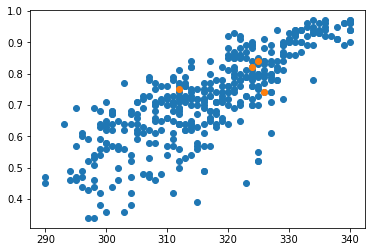

In [235]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0,:],centroids[1,:]) #showing the first position of the centroids

In [236]:
EuclidianDistance=np.zeros([m*K])
EuclidianDistance=EuclidianDistance.reshape(m,K)
EuclidianDistance

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [237]:
for i in range (iterations):
   for k in range(K):
       tempDist=np.sum((X-centroids[:,k])**2,axis=1) #distance between each sample and each cluster
       EuclidianDistance[:,k]=tempDist
EuclidianDistance

array([[1.210324e+02, 1.690100e+02, 6.250289e+02, 1.440064e+02],
       [4.000400e+00, 3.600000e-03, 1.440001e+02, 1.006400e+00],
       [1.000004e+02, 6.401000e+01, 1.600090e+01, 8.101440e+01],
       ...,
       [1.602890e+01, 3.600810e+01, 3.240256e+02, 2.500490e+01],
       [1.960049e+02, 1.440225e+02, 6.400000e-03, 1.690289e+02],
       [4.904410e+01, 8.101690e+01, 4.410400e+02, 6.401210e+01]])

In [238]:
C=np.argmin(EuclidianDistance,axis=1)+1 
#for each sample return the cluster number (columns) for which we have minimum distance

In [239]:
C #checking cluster allocation

array([1, 2, 3, 2, 3, 1, 2, 3, 3, 2, 4, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 4,
       1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 2, 1, 1, 2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       1, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 3, 3, 1, 2, 2, 1, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 1, 3, 1, 1, 1, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3,
       3, 2, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 4, 2, 3, 1, 1, 3, 1, 1, 2, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 2, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 4, 1, 3, 3, 3, 3,
       2, 4, 3, 1, 3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 1, 1, 1, 3, 3, 2,
       4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3,

In [240]:
#indexes of all the samples in each cluster
C1indexes=np.where(C==1)
C2indexes=np.where(C==2)
C3indexes=np.where(C==3)
C4indexes=np.where(C==4)

In [241]:
C4indexes #listing the indexes in the cluster number 4 

(array([ 10,  21,  64,  65, 144, 210, 236, 243, 264, 307, 335, 351, 396]),)

In [242]:
#Grouping of the samples based on the cluster they were assigned to 
Cluster1=X[C1ind]
Cluster2=X[C2ind]
Cluster3=X[C3ind]
Cluster4=X[C4ind]
Cluster5=X[C5ind]

In [243]:
#finding the mean value for each cluster 
C1mean=Cluster1.mean(axis=0)
C2mean=Cluster2.mean(axis=0)
C3mean=Cluster3.mean(axis=0)
C4mean=Cluster4.mean(axis=0)

In [244]:
C4mean

array([332.46341463,   0.89329268])

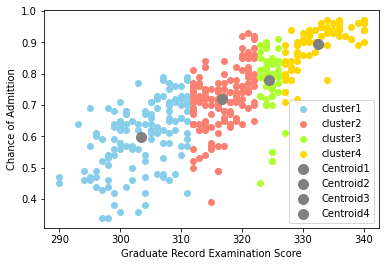

In [245]:
color=['skyblue','salmon','greenyellow','gold']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.scatter(Cluster1[:,0],Cluster1[:,1],c=color[0],label=labels[0])
plt.scatter(Cluster2[:,0],Cluster2[:,1],c=color[1],label=labels[1])
plt.scatter(Cluster3[:,0],Cluster3[:,1],c=color[2],label=labels[2])
plt.scatter(Cluster4[:,0],Cluster4[:,1],c=color[3],label=labels[3])

plt.scatter(C1mean[0],C1mean[1],s=100,c='gray',label='Centroid1')
plt.scatter(C2mean[0],C2mean[1],s=100,c='gray',label='Centroid2')
plt.scatter(C3mean[0],C3mean[1],s=100,c='gray',label='Centroid3')
plt.scatter(C4mean[0],C4mean[1],s=100,c='gray',label='Centroid4')

plt.xlabel('Graduate Record Examination Score')
plt.ylabel('Chance of Admittion')
plt.legend()
plt.show()